# HANK with endogenous risk

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Steady state](#toc2_)    
- 3. [Jacobians](#toc3_)    
- 4. [Find transition path](#toc4_)    
- 5. [Decomposition of consumption](#toc5_)    
- 6. [Fiscal multiplier](#toc6_)    
- 7. [Checks](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANKModel import HANKModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HANKModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## 2. <a id='toc2_'></a>[Steady state](#toc0_)

In [4]:
model.find_ss(do_print=True)

In [5]:
model.test_ss()

Gamma          :       1.0000
pi_w           :       0.0000
N              :       1.0000
w              :       1.0000
pi             :       0.0000
Y              :       1.0000
i              :       0.0500
r              :       0.0500
G              :       0.2000
omega          :       0.0000
B              :       0.3000
T              :       0.2150
Z              :       0.7850
ra             :       0.0500
Delta          :       1.0000
delta          :       0.1667
A_hh           :       0.3000
C_hh           :       0.8000
Y_hh           :       0.7850
AUX_hh         :       1.7278
NKWC_res       :       0.0000
clearing_A     :      -0.0000
clearing_Y     :      -0.0000


In [6]:
model.test_path()

shocks: G Gamma 
unknowns: pi_w N Delta 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production
  w                0.0e+00
  pi               0.0e+00
  Y                0.0e+00
 blocks.central_bank
  i                0.0e+00
  r                4.2e-17
 blocks.government
  omega            0.0e+00
  B                0.0e+00
  T                0.0e+00
 blocks.hh_pre
  Z                0.0e+00
  ra               4.2e-17
  delta            0.0e+00
 hh
  A_hh             1.1e-10
  C_hh             3.4e-11
  Y_hh             7.7e-15
  AUX_hh           9.4e-11
 blocks.NKWC
  NKWC_res         2.7e-12 [target]
 blocks.market_clearing
  clearing_A       1.1e-10 [target]
  clearing_Y       3.4e-11 [target]


## 3. <a id='toc3_'></a>[Jacobians](#toc0_)

In [7]:
model.compute_jacs()

$\mathbf{M}$ vs $\mathbf{M_{\omega}}$

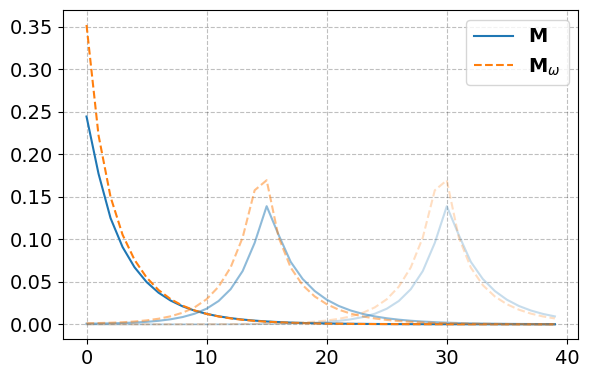

In [8]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

M = model.jac_hh[('C_hh','Z')]
M_omega = model.jac_hh[('C_hh','omega')]

for k,alpha in [(0,1),(15,0.50),(30,0.25)]:

    label = r'$\mathbf{M}$' if k == 0 else None
    ax.plot(par.gamma*M[:40,k],color=colors[0],ls='-',label=label,alpha=alpha)

    label = r'$\mathbf{M}_{\omega}$' if k == 0 else None
    ax.plot(M_omega[:40,k],color=colors[1],ls='--',label=label,alpha=alpha)

ax.legend()
fig.tight_layout()

$\mathbf{M}$ vs $\mathbf{M_{\delta}}$

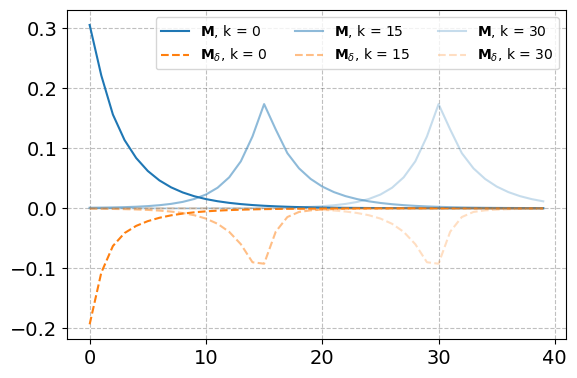

In [9]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

M = model.jac_hh[('C_hh','Z')]
M_delta = model.jac_hh[('C_hh','delta')]

for k,alpha in [(0,1),(15,0.50),(30,0.25)]:

    label = r'$\mathbf{M}$' + f', {k = }'
    ax.plot(M[:40,k],color=colors[0],ls='-',label=label,alpha=alpha)

    label = r'$\mathbf{M}_{\delta}$' + f', {k = }'
    ax.plot(M_delta[:40,k],color=colors[1],ls='--',label=label,alpha=alpha)

ax.legend(ncol=3,fontsize=10);
fig.tight_layout()

$\mathbf{M}$ vs $\mathbf{M_{\Delta}}$

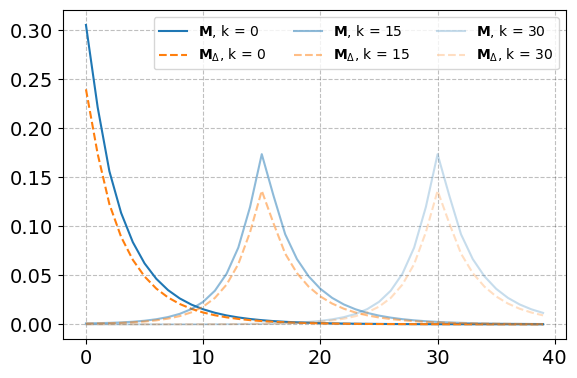

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

M = model.jac_hh[('C_hh','Z')]
M_delta = model.jac_hh[('C_hh','Delta')]

for k,alpha in [(0,1),(15,0.50),(30,0.25)]:

    label = r'$\mathbf{M}$' + f', {k = }'
    ax.plot(M[:40,k],color=colors[0],ls='-',label=label,alpha=alpha)

    label = r'$\mathbf{M}_{\Delta}$' + f', {k = }'
    ax.plot(M_delta[:40,k],color=colors[1],ls='--',label=label,alpha=alpha)

ax.legend(ncol=3,fontsize=10);
fig.tight_layout()

## 4. <a id='toc4_'></a>[Find transition path](#toc0_)

In [11]:
model.find_transition_path(shocks=['G'])

### shocks ###


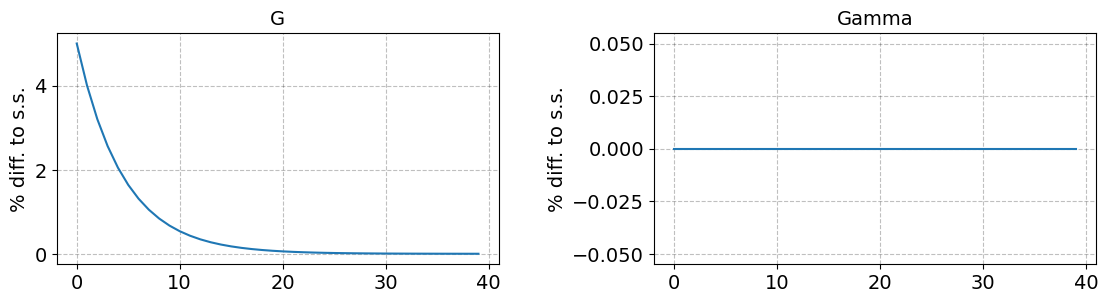


### varnames ###


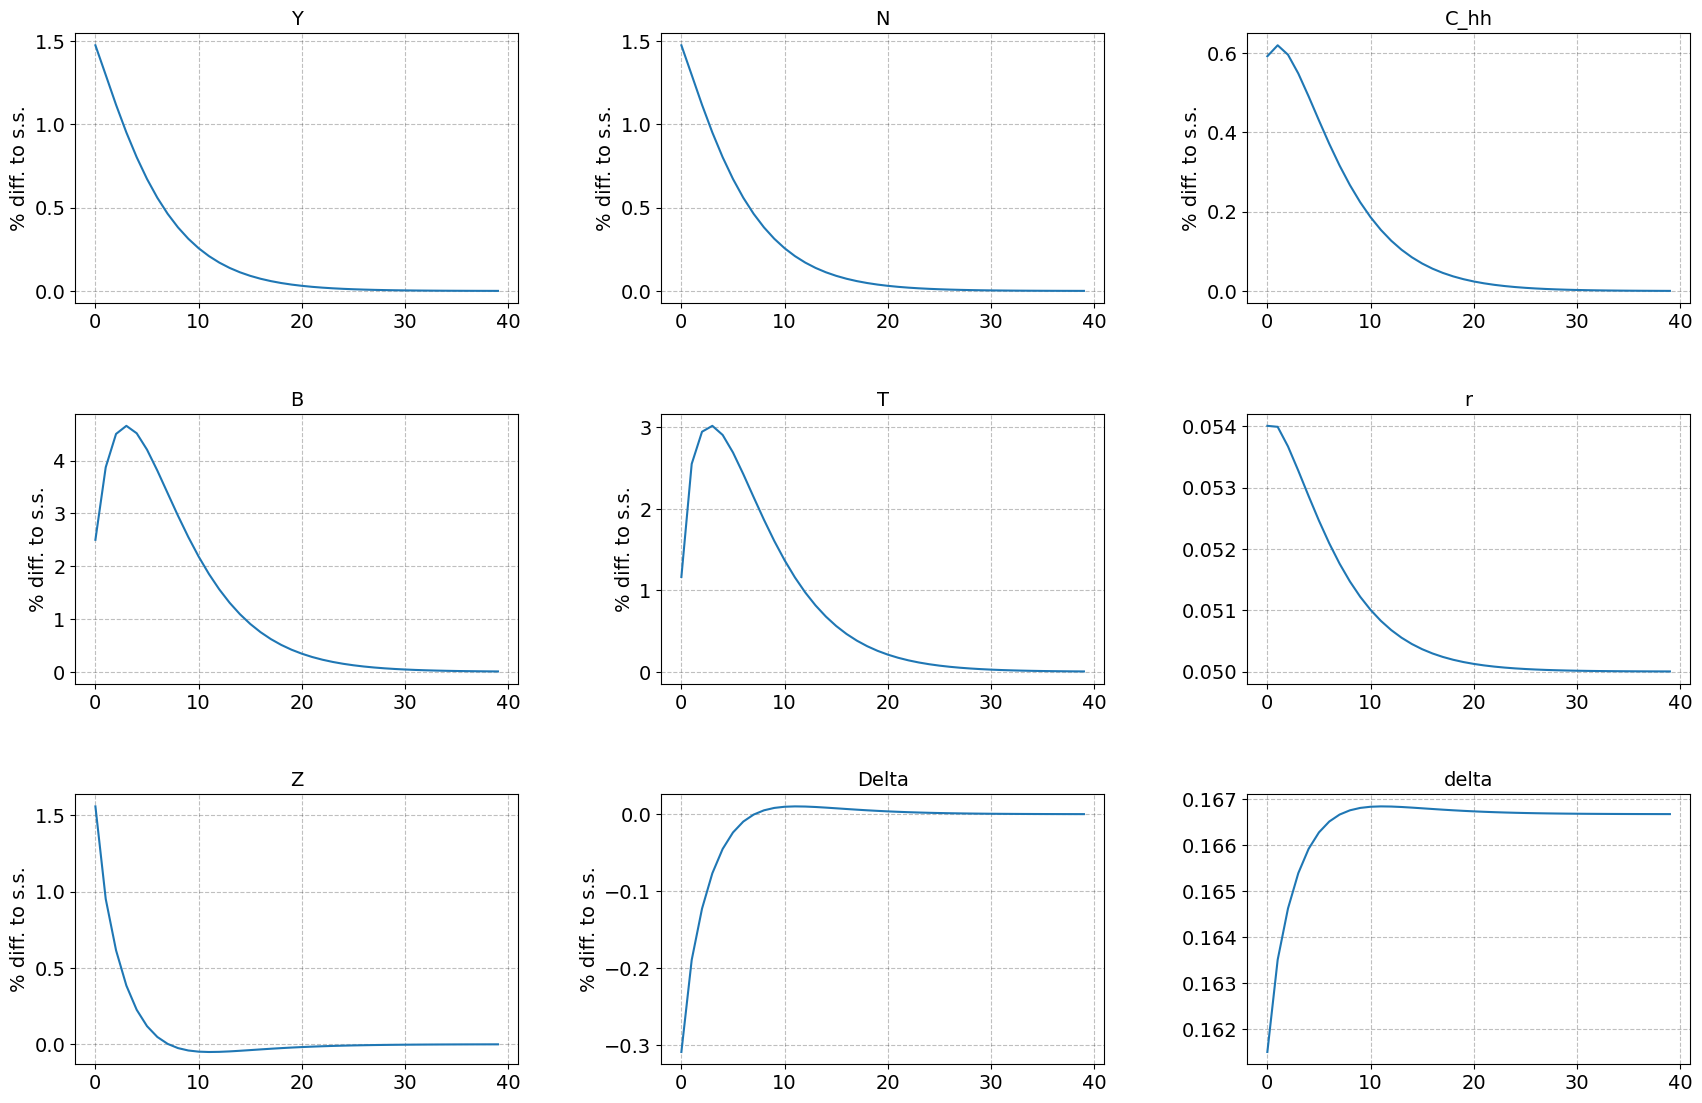


### targets ###


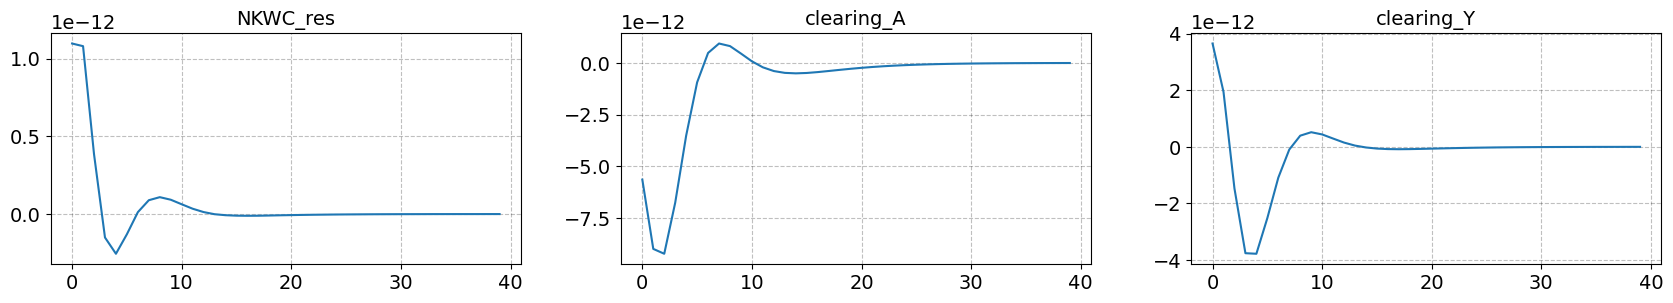

In [12]:
varnames = ['Y','N','C_hh','B','T','r','Z','Delta','delta']
lvl_value = ['r','delta']
abs_diff = []

model.show_IRFs(varnames,abs_diff=abs_diff,lvl_value=lvl_value,T_max=40,ncols=3)

## 5. <a id='toc5_'></a>[Decomposition of consumption](#toc0_)

Decomposition:

In [13]:
path_Z = model.decompose_hh_path(use_inputs=['Z'])
path_Delta_delta = model.decompose_hh_path(use_inputs=['Delta','delta'])
path_delta = model.decompose_hh_path(use_inputs=['delta'])
path_ra = model.decompose_hh_path(use_inputs=['ra'])

Plot:

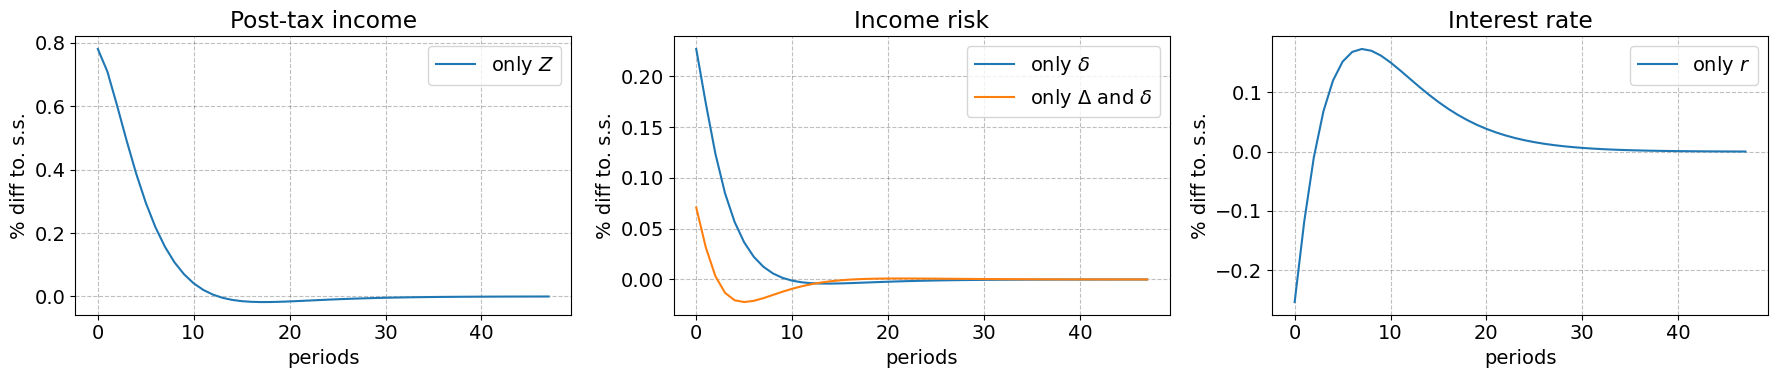

In [14]:
T_max = 48

fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,3,1)
ax.set_title('Post-tax income')

ax.plot((path_Z.C_hh[:T_max]/ss.C_hh-1)*100,label=r'only $Z$')

ax.set_ylabel('% diff to. s.s.')
ax.set_xlabel('periods')
ax.legend()

# income risk
ax = fig.add_subplot(1,3,2)
ax.set_title('Income risk')

ax.plot((path_delta.C_hh[:T_max]/ss.C_hh-1)*100,label=r'only $\delta$')
ax.plot((path_Delta_delta.C_hh[:T_max]/ss.C_hh-1)*100,label=r'only $\Delta$ and $\delta$')
ax.set_ylabel('% diff to. s.s.')
ax.set_xlabel('periods')
ax.legend()
fig.tight_layout()

# interest rate
ax = fig.add_subplot(1,3,3)
ax.set_title('Interest rate')

ax.plot((path_ra.C_hh[:T_max]/ss.C_hh-1)*100,label=r'only $r$')
ax.set_ylabel('% diff to. s.s.')
ax.set_xlabel('periods')
ax.legend()
fig.tight_layout()

## 6. <a id='toc6_'></a>[Fiscal multiplier](#toc0_)

In [15]:
multiplier = model.fiscal_multiplier()
print(f"The cummulative fiscal multiplier is {multiplier:.2f}")

The cummulative fiscal multiplier is 1.54


**Comparisons:**

In [16]:
models = {}
BY_ratios = [0.20,0.30,0.40]
for BY_ratio in BY_ratios:

    print(f'{BY_ratio = :.2f}')

    # a. baseline
    try:

        model_ = model.copy()    
        model_.par.gamma = par.gamma
        model_.par.BY_ratio = BY_ratio
        model_.find_ss()
        model_.compute_jacs(skip_shocks=True)
        MPC = model_.jac_hh[("C_hh","omega")][0,0]
        MPC_delta = model_.jac_hh[("C_hh","delta")][0,0]
        print(f' xi = 1.00: {MPC = :.3f}, {MPC_delta = :.3f}')
        model_.find_transition_path(shocks=['G'])
        models[(BY_ratio,model_.par.gamma,model_.par.xi)] = model_

    except Exception as e:
        
        print('')
        print(e)

    # b. gamma = 1
    try:

        model__ = model_.copy()
        model__.par.gamma = 1.0
        model__.compute_jacs(skip_hh=True,skip_shocks=True)
        model__.find_transition_path(shocks=['G'])
        models[(BY_ratio,model__.par.gamma,model__.par.xi)] = model__

    except Exception as e:

        print(e)

    # c. xi = 0.50
    try:

        model__ = model_.copy()
        model__.par.xi = 0.50
        model__.find_ss(do_print=False)        
        model__.compute_jacs(skip_shocks=True)

        MPC = model__.jac_hh[("C_hh","omega")][0,0]
        MPC_delta = model__.jac_hh[("C_hh","delta")][0,0]
        print(f' xi = 0.50: {MPC = :.3f}, {MPC_delta = :.3f}')

        model__.find_transition_path(shocks=['G'])
        models[(BY_ratio,model__.par.gamma,model__.par.xi)] = model__

    except Exception as e:

        print(e)


BY_ratio = 0.20
 xi = 1.00: MPC = 0.455, MPC_delta = -0.251
 xi = 0.50: MPC = 0.464, MPC_delta = -0.264
BY_ratio = 0.30
 xi = 1.00: MPC = 0.352, MPC_delta = -0.193
 xi = 0.50: MPC = 0.389, MPC_delta = -0.223
BY_ratio = 0.40
 xi = 1.00: MPC = 0.295, MPC_delta = -0.157
 xi = 0.50: MPC = 0.337, MPC_delta = -0.193


Plot:

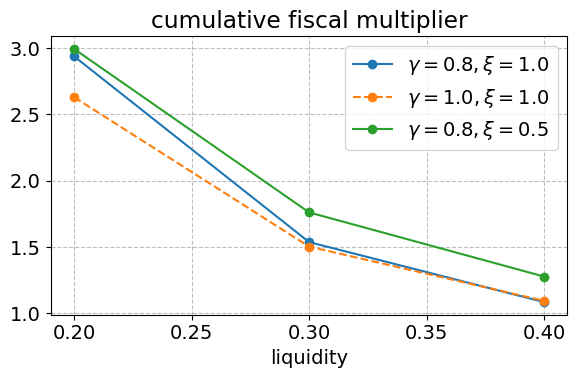

In [17]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for (gamma,xi) in [(par.gamma,par.xi),(1.0,par.xi),(par.gamma,0.50)]:

    y = []
    for BY_ratio in BY_ratios: 
        if (BY_ratio,gamma,xi) in models:
            y.append(models[(BY_ratio,gamma,xi)].fiscal_multiplier())
        else:
            y.append(np.nan)
            
    ls = '-' if gamma == par.gamma else '--'
    ax.plot(BY_ratios,y,ls=ls,marker='o',label=fr'$\gamma = {gamma}, \xi = {xi}$')

ax.legend();
ax.set_title('cumulative fiscal multiplier');
ax.set_xlabel('liquidity')
fig.tight_layout()

## 7. <a id='toc7_'></a>[Checks](#toc0_)

In [18]:
model_check = HANKModelClass(name='baseline',par={'mon_rule':'fixed_rr'})
model_check.find_ss()
model_check.compute_jacs()
model_check.find_transition_path(shocks=['G'])
model_check.find_IRFs(shocks=['G'])

Plot:

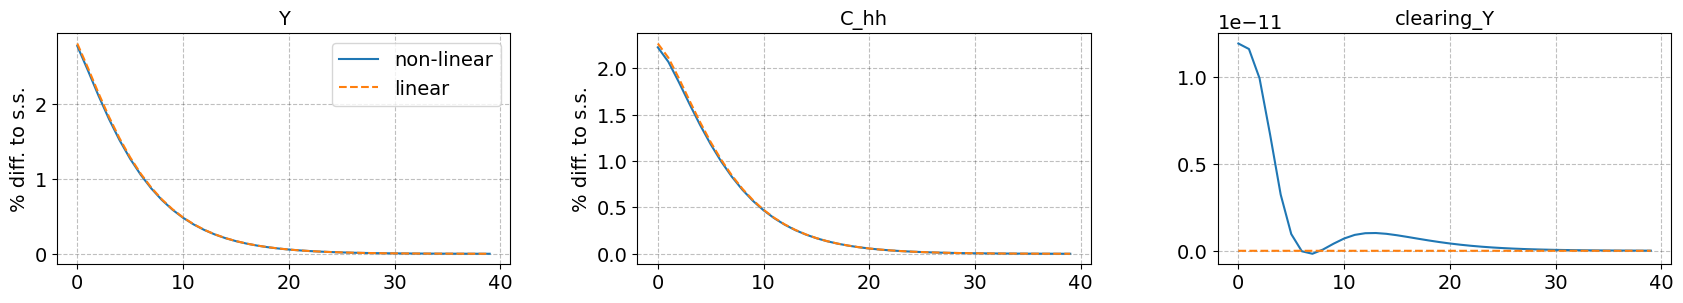

In [19]:
model_check.show_IRFs(['Y','C_hh','clearing_Y'],do_shocks=False,do_targets=False,do_linear=True,T_max=40,ncols=3)

Verify analytical result:

In [20]:
M = model_check.jac_hh[('C_hh','Z')]
M_Delta = model_check.jac_hh[('C_hh','Delta')]
M_delta = model_check.jac_hh[('C_hh','delta')]
IRF = model_check.IRF

In [21]:
chi = ss.Z**(-1)/(par.phi_obar-par.phi_ubar)
print(f'{chi = :.2f}')
IRF_C_hh = (par.gamma*M-(1-par.gamma)*chi*M_delta)@IRF['Z']
max_abs_diff = np.max(np.abs(IRF['C_hh']-IRF_C_hh))
print(f'{max_abs_diff = :.2e}')

chi = 2.12
max_abs_diff = 2.69e-07
